<a href="https://colab.research.google.com/github/Rohan171819/Deep_Learning_Projects./blob/main/Cat_Breed_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d yapwh1208/cats-breed-dataset

 98% 529M/541M [00:10<00:00, 39.5MB/s]
100% 541M/541M [00:10<00:00, 52.5MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile("/content/cats-breed-dataset.zip","r")
zip_ref.extractall("/content")
zip_ref.close()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout

In [6]:
# Generators...
train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/drive/MyDrive/Cat Breed Data/Train Data",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory="/content/drive/MyDrive/Cat Breed Data/Test Data",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256),
)

Found 425 files belonging to 5 classes.
Found 290 files belonging to 5 classes.


In [7]:
# Normalize...
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
# CNN MOdel...
model=Sequential()
model.add(Conv2D(16,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding="valid",strides=2))
model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding="valid",strides=2))
model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding="valid",strides=2))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(5,activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 32)      128       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [11]:
history=model.fit(train_ds,epochs=50,validation_data=validation_ds)

Epoch 1/50
14/14 [==============================] - 20s 721ms/step - loss: 1.9816 - accuracy: 0.3647 - val_loss: 1.8650 - val_accuracy: 0.1862
Epoch 3/50
14/14 [==============================] - 24s 1s/step - loss: 1.5927 - accuracy: 0.4612 - val_loss: 2.4203 - val_accuracy: 0.1966
Epoch 4/50
14/14 [==============================] - 19s 767ms/step - loss: 1.5697 - accuracy: 0.4353 - val_loss: 1.7564 - val_accuracy: 0.2138
Epoch 5/50
14/14 [==============================] - 20s 756ms/step - loss: 1.2985 - accuracy: 0.5388 - val_loss: 3.4060 - val_accuracy: 0.1828
Epoch 6/50
14/14 [==============================] - 23s 1s/step - loss: 1.3194 - accuracy: 0.5082 - val_loss: 3.1494 - val_accuracy: 0.1828
Epoch 7/50
14/14 [==============================] - 24s 1s/step - loss: 1.1505 - accuracy: 0.5741 - val_loss: 3.0414 - val_accuracy: 0.1759
Epoch 8/50
14/14 [==============================] - 20s 790ms/step - loss: 1.0998 - accuracy: 0.6212 - val_loss: 2.0300 - val_accuracy: 0.1621
Epoch 9/

In [12]:
import cv2

In [20]:
test_img=cv2.imread("/content/male-bengal-cat.jpg")

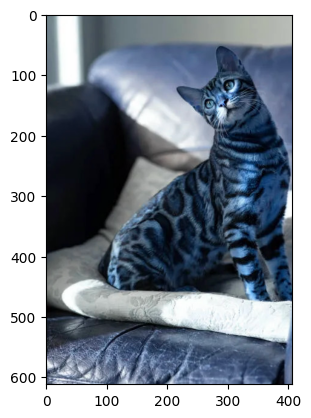

In [21]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [22]:
test_img.shape

(612, 408, 3)

In [23]:
test_img=cv2.resize(test_img,(256,256))

In [24]:
test_input=test_img.reshape(1,256,256,3)

In [25]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.0000000e+00, 0.0000000e+00, 2.4458298e-11, 0.0000000e+00,
        1.0000000e+00]], dtype=float32)

In [26]:
test_img2=cv2.imread("/content/Ragdoll cat.jpg")

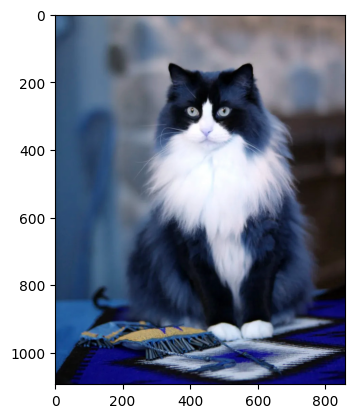

In [27]:
plt.imshow(test_img2)

In [29]:
test_img2.shape

(1094, 860, 3)

In [30]:
test_img2=cv2.resize(test_img2,(256,256))

In [31]:
test_input2=test_img.reshape(1,256,256,3)

In [32]:
model.predict(test_input2)

1/1 [==============================] - 0s 21ms/step


array([[0.0000000e+00, 0.0000000e+00, 2.4458298e-11, 0.0000000e+00,
        1.0000000e+00]], dtype=float32)

In [33]:
test_img3=cv2.imread("/content/Domestic shorthair cat.jpg")

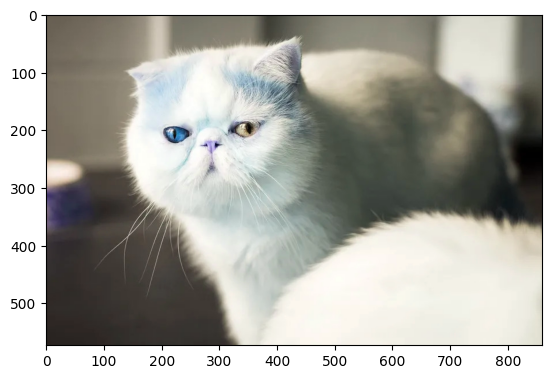

In [34]:
plt.imshow(test_img3)

In [35]:
test_img3.shape

(573, 860, 3)

In [36]:
test_img3=cv2.resize(test_img3,(256,256))

In [37]:
test_input3=test_img3.reshape(1,256,256,3)

In [38]:
model.predict(test_input3)

1/1 [==============================] - 0s 36ms/step


array([[0.0000000e+00, 2.3442858e-25, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00]], dtype=float32)

In [39]:
import pickle
pickle.dump(model,open("Cat Breed Classification.pkl","wb"))